In [1]:
import pandas as pd
import os
import json


In [2]:
business_json_path = 'business.json'
business = pd.read_json(business_json_path, lines=True)
business.head()


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [3]:
filtered_business = business[business['categories'].str.contains('Breakfast & Brunch', na=False) &
                             business['categories'].str.contains('Restaurants', na=False) &
                             (business['city'] == 'Indianapolis')& 
                             (business['state'] == 'IN')]



filtered_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
12,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,1,"{'RestaurantsReservations': 'False', 'Restaura...","American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ..."
636,HCbJPXWXvwN-C7XfmVy3gA,Granite City Food & Brewery,"49 W Maryland St, Ste B03A",Indianapolis,IN,46204,39.766420,-86.159245,3.5,258,0,"{'RestaurantsGoodForGroups': 'True', 'Ambience...","Desserts, Breweries, Breakfast & Brunch, Resta...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-0:0',..."
770,2DsplH_vy4GCcEnVpn0AbA,Cafe Olivia,222 E Market St,Indianapolis,IN,46204,39.768973,-86.153309,4.5,34,1,"{'BikeParking': 'True', 'RestaurantsAttire': '...","Sandwiches, Breakfast & Brunch, Food Stands, I...","{'Monday': '10:45-14:0', 'Tuesday': '10:45-14:..."
909,Iuir7lUtx-LMhYtStwyf3Q,Another Broken Egg Cafe,"5025 E 82nd St, Ste 2500",Indianapolis,IN,46250,39.904151,-86.083809,4.0,26,1,"{'WheelchairAccessible': 'True', 'RestaurantsG...","American (Traditional), Restaurants, Breakfast...","{'Monday': '7:0-14:0', 'Tuesday': '7:0-14:0', ..."
1838,zwfN21b6gN2XGjNG6MYNzQ,Wolfgang Puck Express,2500 S High School Rd,Indianapolis,IN,46241,39.716693,-86.297826,2.0,70,0,"{'RestaurantsAttire': 'u'casual'', 'NoiseLevel...","Breakfast & Brunch, American (New), Salad, Res...",None


In [4]:
len(filtered_business)

337

In [5]:
def extract_attribute_keys(row):
    keys = set()
    if pd.notna(row):
        for key, value in row.items():
            keys.add(key)
          
            if isinstance(value, dict):
                keys.update(value.keys())
    return keys


all_keys = set()
filtered_business['attributes'].apply(lambda x: all_keys.update(extract_attribute_keys(x)))

all_keys

{'AgesAllowed',
 'Alcohol',
 'Ambience',
 'BYOB',
 'BYOBCorkage',
 'BestNights',
 'BikeParking',
 'BusinessAcceptsBitcoin',
 'BusinessAcceptsCreditCards',
 'BusinessParking',
 'ByAppointmentOnly',
 'Caters',
 'CoatCheck',
 'Corkage',
 'DogsAllowed',
 'DriveThru',
 'GoodForDancing',
 'GoodForKids',
 'GoodForMeal',
 'HappyHour',
 'HasTV',
 'Music',
 'NoiseLevel',
 'OutdoorSeating',
 'RestaurantsAttire',
 'RestaurantsDelivery',
 'RestaurantsGoodForGroups',
 'RestaurantsPriceRange2',
 'RestaurantsReservations',
 'RestaurantsTableService',
 'RestaurantsTakeOut',
 'Smoking',
 'WheelchairAccessible',
 'WiFi'}

In [6]:
def flatten_attributes(row):
    flattened = {}
    if pd.notna(row):
        for key, value in row.items():
            if isinstance(value, dict):
                for sub_key, sub_value in value.items():
                    flattened[sub_key] = 1 if sub_value else 0
            else:
                flattened[key] = 1 if value else 0
    return pd.Series(flattened)


attributes_df = filtered_business['attributes'].apply(flatten_attributes)


attributes_df.fillna(0, inplace=True)


attributes_df = attributes_df.astype(int)


filtered_business = filtered_business.join(attributes_df)




In [7]:
len(filtered_business)

337

In [8]:



business_ids = set(filtered_business['business_id'])


filtered_reviews = []


review_json_path = 'review.json'
chunk_size = 100000  
for chunk in pd.read_json(review_json_path, lines=True, chunksize=chunk_size):
    
    filtered_chunk = chunk[chunk['business_id'].isin(business_ids)]
    filtered_reviews.append(filtered_chunk)


all_filtered_reviews = pd.concat(filtered_reviews, ignore_index=True)


merged_data = pd.merge(filtered_business, all_filtered_reviews, on='business_id')



In [9]:
merged_data.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,BYOBCorkage,Smoking,review_id,user_id,stars_y,useful,funny,cool,text,date
0,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,...,0,0,YByDh56Hl11HoYdBm-uArA,9hhRs_n85m-jsKOXp3jt7Q,1,0,0,0,Went there at 4am and there was only one waitr...,2016-05-08 08:49:25
1,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,...,0,0,3vwdkRRoUe4PewzD8HvQbQ,-BX5x3Ys-2JzFba3LiWlHA,1,0,0,0,I had an immensely frustrating experience here...,2017-08-30 10:52:52
2,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,...,0,0,LX2or1ZvpaO8x9Xb8UxF5Q,tftplxTcJYHU8nrwCwtzFg,2,1,0,0,"Food was decent, staff were accommodating. Res...",2015-03-21 14:00:29
3,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,...,0,0,LWQJo1dFvAgJQF_dxN6JCA,G_eZLhf1Kw5WBpMlXHizNQ,4,0,0,0,The staff here was great. We had a bunch of pe...,2014-03-16 13:59:31
4,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,...,0,0,yQJXhZIF6_VMC5gY7gBDAw,iYpCMhEqsped1647fF_u-A,1,0,0,0,Food was awful! Hamburger was burnt and cold....,2018-08-12 15:32:47


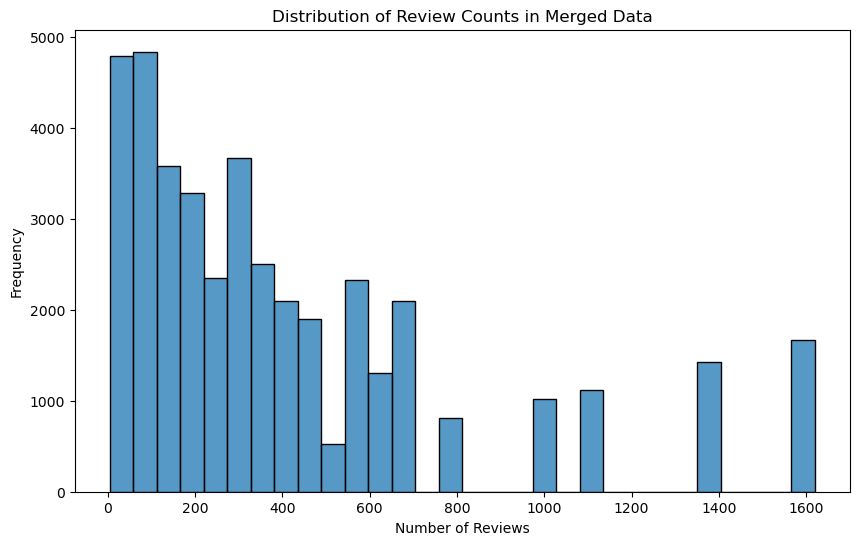

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(merged_data['review_count'], bins=30, kde=False)
plt.title('Distribution of Review Counts in Merged Data')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()



In [11]:

mean_review_count = merged_data['review_count'].mean()
median_review_count = merged_data['review_count'].median()
std_review_count = merged_data['review_count'].std()
min_review_count = merged_data['review_count'].min()
max_review_count = merged_data['review_count'].max()


quantile_25 = merged_data['review_count'].quantile(0.25)
quantile_75 = merged_data['review_count'].quantile(0.75)


print(f"Mean Review Count: {mean_review_count}")
print(f"Median Review Count: {median_review_count}")
print(f"Standard Deviation of Review Count: {std_review_count}")
print(f"Minimum Review Count: {min_review_count}")
print(f"Maximum Review Count: {max_review_count}")
print(f"25th Percentile: {quantile_25}")
print(f"75th Percentile: {quantile_75}")


Mean Review Count: 419.1356769320163
Median Review Count: 305.0
Standard Deviation of Review Count: 405.72933166844314
Minimum Review Count: 5
Maximum Review Count: 1619
25th Percentile: 124.0
75th Percentile: 567.0


In [12]:
#chose reviews from 124 so the 25th percentile 
#look at attribute category and t-statistics

import scipy.stats as stats

# List of attribute columns - replace this with your actual list of attributes
attribute_columns = ['AgesAllowed',
 'Alcohol',
 'Ambience',
 'BYOB',
 'BYOBCorkage',
 'BestNights',
 'BikeParking',
 'BusinessAcceptsBitcoin',
 'BusinessAcceptsCreditCards',
 'BusinessParking',
 'ByAppointmentOnly',
 'Caters',
 'CoatCheck',
 'Corkage',
 'DogsAllowed',
 'DriveThru',
 'GoodForDancing',
 'GoodForKids',
 'GoodForMeal',
 'HappyHour',
 'HasTV',
 'Music',
 'NoiseLevel',
 'OutdoorSeating',
 'RestaurantsAttire',
 'RestaurantsDelivery',
 'RestaurantsGoodForGroups',
 'RestaurantsPriceRange2',
 'RestaurantsReservations',
 'RestaurantsTableService',
 'RestaurantsTakeOut',
 'Smoking',
 'WheelchairAccessible',
 'WiFi']

for attribute in attribute_columns:
    with_attribute = merged_data[merged_data[attribute] == 1]['stars_x']
    without_attribute = merged_data[merged_data[attribute] == 0]['stars_x']
    t_stat, p_value = stats.ttest_ind(with_attribute, without_attribute, nan_policy='omit')
    print(f"{attribute}: t-statistic = {t_stat}, p-value = {p_value}")
# T-Statistic:

# A measure of the difference between the two groups (with and without the attribute) relative to the variation in the sample data.
# A higher absolute value of the t-statistic indicates a greater difference between the two groups.    
# The direction of the impact (positive or negative) is indicated by the t-statistic. A positive t-statistic suggests higher ratings when the attribute is present, while a negative t-statistic indicates higher ratings when the attribute is absent.
    
# DogsAllowed:
# T-test: T-statistic = 123.635, P-value = 0.0. This indicates a very significant difference in ratings, with higher ratings for businesses that allow dogs.
# Average Ratings: AvgRatingWith (4.158325) is higher than AvgRatingWithout (3.809271). This confirms that businesses allowing dogs tend to have higher ratings.


AgesAllowed: t-statistic = -15.482210290411617, p-value = 6.487581210724267e-54
Alcohol: t-statistic = 22.741553767034308, p-value = 8.718902833824104e-114
Ambience: t-statistic = 10.01358656896556, p-value = 1.413398621861633e-23
BYOB: t-statistic = 55.79084767931457, p-value = 0.0
BYOBCorkage: t-statistic = -12.020003363862129, p-value = 3.169895042436406e-33
BestNights: t-statistic = 51.05145253033834, p-value = 0.0
BikeParking: t-statistic = 8.52923443317833, p-value = 1.5224233831246584e-17
BusinessAcceptsBitcoin: t-statistic = 69.47992187327235, p-value = 0.0
BusinessAcceptsCreditCards: t-statistic = 8.569368170790662, p-value = 1.0759763241304889e-17
BusinessParking: t-statistic = 24.234186186213744, p-value = 7.733618970840199e-129
ByAppointmentOnly: t-statistic = 67.042213164804, p-value = 0.0
Caters: t-statistic = 27.924092232305455, p-value = 5.204011924915935e-170
CoatCheck: t-statistic = 49.28961310807718, p-value = 0.0
Corkage: t-statistic = 35.22671917538732, p-value = 7

In [13]:
#attribute rating with or without
import pandas as pd


filtered_data = merged_data[merged_data['review_count'] >= 124]


attribute_columns = [
    'AgesAllowed', 'Alcohol', 'Ambience', 'BYOB', 'BYOBCorkage', 'BestNights', 
    'BikeParking', 'BusinessAcceptsBitcoin', 'BusinessAcceptsCreditCards', 'BusinessParking',
    'ByAppointmentOnly', 'Caters', 'CoatCheck', 'Corkage', 'DogsAllowed',
    'DriveThru', 'GoodForDancing', 'GoodForKids', 'GoodForMeal', 'HappyHour',
    'HasTV', 'Music', 'NoiseLevel', 'OutdoorSeating', 'RestaurantsAttire',
    'RestaurantsDelivery', 'RestaurantsGoodForGroups', 'RestaurantsPriceRange2',
    'RestaurantsReservations', 'RestaurantsTableService', 'RestaurantsTakeOut',
    'Smoking', 'WheelchairAccessible', 'WiFi'
]


avg_ratings_list = []

for attribute in attribute_columns:
    avg_with_attribute = filtered_data[filtered_data[attribute] == 1]['stars_x'].mean()
    avg_without_attribute = filtered_data[filtered_data[attribute] == 0]['stars_x'].mean()
    avg_ratings_list.append({
        'Attribute': attribute,
        'AvgRatingWith': avg_with_attribute,
        'AvgRatingWithout': avg_without_attribute
    })


avg_ratings_df = pd.DataFrame(avg_ratings_list)
avg_ratings_df

# * No bar: businesses with or without the specific attribute in your dataset. 
# * Significantly Higher Ratings: Attributes like BestNights, GoodForDancing, Music, and Smoking 
# * Slightly Higher or Comparable Ratings: Attributes such as Alcohol, Ambience, BYOB, and WiFi Attributes with Lower Ratings When Present:
# * Significantly Lower Ratings: DogsAllowed shows a noticeable drop in average rating when present. 
# * Ratings Not Affected Significantly: Several attributes, such as BusinessAcceptsCreditCards, HasTV, and RestaurantsReservations, show minimal differences in average ratings whether they are present or not. This could indicate that these features are standard expectations and don't significantly influence customer satisfaction.
# * Notably Higher Ratings When Absent: GoodForKids and NoiseLevel have higher average ratings when absent, which might suggest that businesses not suitable for kids or those with lower noise levels are preferred by certain customers.
# * Attributes with No Data on Impact: For attributes like RestaurantsDelivery, RestaurantsPriceRange2, and RestaurantsTakeOut, where one of the average ratings is NaN, it's difficult to draw conclusions since there's no comparative data.



,Attribute,AvgRatingWith,AvgRatingWithout
0,AgesAllowed,NaN,4.111769
1,Alcohol,4.112392,4.000000
2,Ambience,4.112392,4.000000
3,BYOB,4.209452,4.068991
4,BYOBCorkage,3.764532,4.140511
5,BestNights,4.267860,4.068789
6,BikeParking,4.109773,4.226079
7,BusinessAcceptsBitcoin,4.225844,4.040881
8,BusinessAcceptsCreditCards,4.112341,4.000000
9,BusinessParking,4.111769,NaN


In [14]:
import pandas as pd


filtered_data = merged_data[merged_data['review_count'] >= 124]


attribute_columns = [
    'Alcohol', 'Ambience',  'BusinessParking','DogsAllowed',
    'GoodForDancing', 'GoodForKids', 'Music', 'NoiseLevel','RestaurantsAttire',
    'Smoking', 'WheelchairAccessible', 'WiFi'
]


avg_ratings_list = []

for attribute in attribute_columns:
    avg_with_attribute = filtered_data[filtered_data[attribute] == 1]['stars_x'].mean()
    avg_without_attribute = filtered_data[filtered_data[attribute] == 0]['stars_x'].mean()
    avg_ratings_list.append({
        'Attribute': attribute,
        'AvgRatingWith': avg_with_attribute,
        'AvgRatingWithout': avg_without_attribute
    })


avg_ratings_df = pd.DataFrame(avg_ratings_list)
avg_ratings_df

# * No bar: businesses with or without the specific attribute in your dataset. 
# * Significantly Higher Ratings: Attributes like BestNights, GoodForDancing, Music, and Smoking 
# * Slightly Higher or Comparable Ratings: Attributes such as Alcohol, Ambience, BYOB, and WiFi Attributes with Lower Ratings When Present:
# * Significantly Lower Ratings: DogsAllowed shows a noticeable drop in average rating when present. 
# * Ratings Not Affected Significantly: Several attributes, such as BusinessAcceptsCreditCards, HasTV, and RestaurantsReservations, show minimal differences in average ratings whether they are present or not. This could indicate that these features are standard expectations and don't significantly influence customer satisfaction.
# * Notably Higher Ratings When Absent: GoodForKids and NoiseLevel have higher average ratings when absent, which might suggest that businesses not suitable for kids or those with lower noise levels are preferred by certain customers.
# * Attributes with No Data on Impact: For attributes like RestaurantsDelivery, RestaurantsPriceRange2, and RestaurantsTakeOut, where one of the average ratings is NaN, it's difficult to draw conclusions since there's no comparative data.



,Attribute,AvgRatingWith,AvgRatingWithout
0,Alcohol,4.112392,4.000000
1,Ambience,4.112392,4.000000
2,BusinessParking,4.111769,NaN
3,DogsAllowed,4.158325,3.809271
4,GoodForDancing,4.313383,4.066143
5,GoodForKids,4.108581,4.263281
6,Music,4.290521,4.067342
7,NoiseLevel,4.105520,4.327055
8,RestaurantsAttire,4.107081,4.256410
9,Smoking,4.304292,4.059641


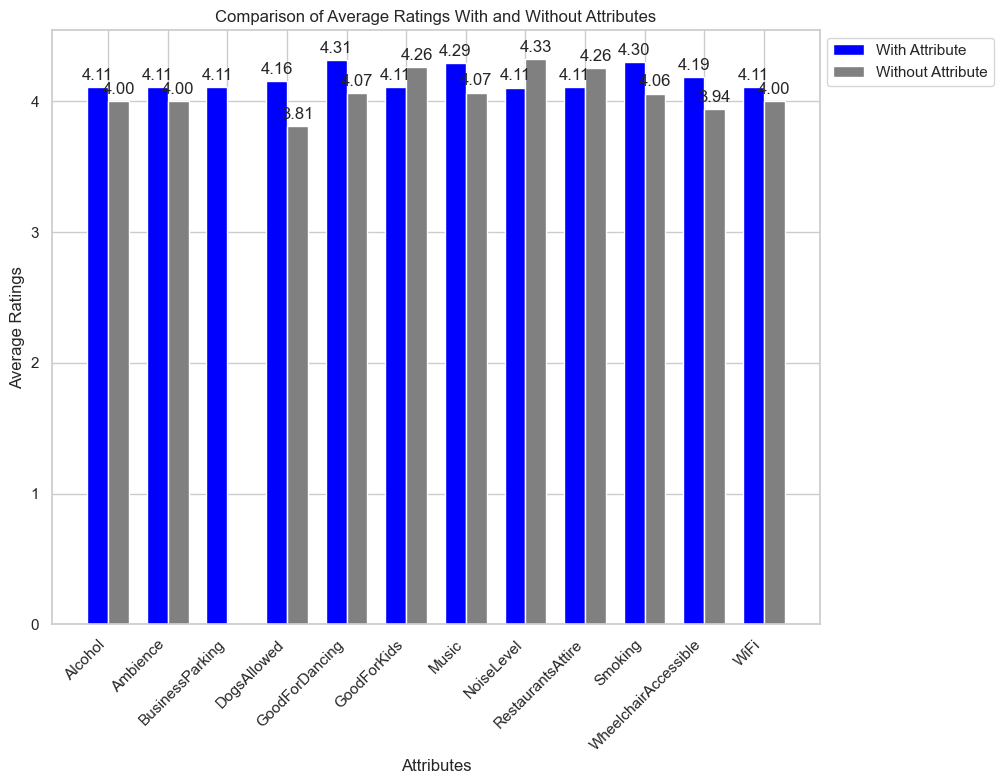

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming avg_ratings_df is already created as per your code

# Set a professional plot style
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the 'AvgRatingWith' and 'AvgRatingWithout' side by side for each attribute
width = 0.35  # Width of the bars
ind = range(len(avg_ratings_df))  # the x locations for the groups

# Creating two bar plots for with and without the attribute, in white and blue
bars1 = ax.bar(ind, avg_ratings_df['AvgRatingWith'], width, label='With Attribute', color='blue')
bars2 = ax.bar([p + width for p in ind], avg_ratings_df['AvgRatingWithout'], width, label='Without Attribute', color='grey')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Attributes')
ax.set_ylabel('Average Ratings')
ax.set_title('Comparison of Average Ratings With and Without Attributes')
ax.set_xticks([p + width / 2 for p in ind])
ax.set_xticklabels(avg_ratings_df['Attribute'], rotation=45, ha='right')

# Move the legend to the side of the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adding the average values on top of the bars
def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values(bars1)
add_values(bars2)

# Adjust layout to accommodate the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()



In [16]:
from collections import Counter
import re
import pandas as pd

# Sample DataFrame
# Replace with your actual DataFrame: merged_data = pd.read_csv('your_data.csv')

keyword_groups = {
    "kids": ["kids", "children", "child"],
    "music_dancing": ["dancing", "music", "dance", "party"],
    "smoking": ["smoker", "cigarettes", "hookah", "smoke", "tobacco",'vape'],
    "alcohol": ["alcohol", "drinks", "mocktail", "cocktail", "beer", "wine", "spirits",'happyhour'],
    "ambience": ["atmosphere", "ambience", "vibe", "artsy", "environment", "mood",'outside','accessible','wheelchair','ada','friendly','server','service','waiter','waitress'],
    "animals": ["animals", "dogs", "cats", "pets",'pet','furry'],
    "dress": ["dress", "attire", "outfit", "clothing", "fashion",'formal'],
    "coat_check": ["coat check", "cloakroom"],
    "tv": ["tv", "television"],
    "wifi": ["wifi", "wi-fi", "internet",'connection'],
    "reservation": ["reservation", "booking",'inadvance','appointment'],
    "payment_methods": ["credit cards", "venmo", "apple pay", "cash", "debit", "payment"],
    "noise_level": ["noise level", "loud", "quiet", "noisy", "sound", "volume"],
    'parking':['parking']
    
}


def get_keyword_context(text, keyword, window=2):
    context_pattern = fr'(\b\w+\b(?:\W+\b\w+\b){{0,{window-1}}})\W+{keyword}\W+((?:\b\w+\b\W+){{0,{window-1}}}\b\w+\b)'
    
    contexts = re.findall(context_pattern, text, re.IGNORECASE)
    return [f"{pre_context} {keyword} {post_context}" for pre_context, post_context in contexts]

# Analyze context for each keyword in each group
for group, keywords in keyword_groups.items():
    group_contexts = []
    for keyword in keywords:
        contexts = [context for text in merged_data['text'] for context in get_keyword_context(text, keyword)]
        group_contexts.extend(contexts)
    
    # Count and display the most common phrases
    top_contexts = Counter(group_contexts).most_common(20)
    print(f"Top contexts for '{group}':")
    for phrase, count in top_contexts:
        print(f"  '{phrase}': {count}")
    print("\n")


Top contexts for 'kids':
  'My kids and I': 3
  'we had kids with us': 3
  'leave the kids at home': 3
  'from the kids menu as': 2
  'Anywho, the kids alternate days': 2
  'bribe the kids and tell': 2
  'ordered the kids Mac and': 2
  'of my kids ordered. I': 2
  'and my kids eat like': 2
  'like most kids come on': 2
  'yummy. My kids 20 pancakes': 2
  'without the kids and had': 2
  'training these kids at these': 2
  'that my kids love Steak': 2
  'wife and kids got hot': 2
  's a kids table towards': 2
  'section with kids The host': 2
  'good for kids those who': 2
  'have a kids menu and': 2
  'bribe the kids I let': 2


Top contexts for 'music_dancing':
  'had a party of 8': 6
  'had a party of 6': 6
  'for a party of two': 5
  'for a party of 6': 5
  'for a party of 2': 5
  'your entire party is present': 5
  'were a party of 6': 4
  'with a party of 4': 4
  'in my party had the': 4
  'with a party of 5': 4
  'a large party in the': 4
  'with a party of 6': 4
  'with a party o

In [17]:
#this might be a better approach
keyword_groups = {
    "kids_allowed": [
        "kids welcome", "child-friendly", "good for kids", "children allowed", "suitable for children", 
        "family-friendly", "welcomes children", "kid-approved", "children-friendly environment", "safe for kids",'kids allowed','allowed kids','children allowed','kids ordered'
    ],
    "kids_not_allowed": [
        "no kids", "not good for kids", "children not allowed", "kids not welcome", "adults only", 
        "not child-friendly", "no children", "not suitable for children", "kid-free zone", "children restricted"
    ],
    "music_positive": [
        "great music", "live music", "dance floor", "good music", "music was good", "excellent playlist", 
        "fantastic music", "enjoyable music", "live band", "good tunes"
    ],
    "music_negative": [
        "noisy music", "loud music", "music too loud", "overpowering music", "annoying music", 
        "distracting music", "unpleasant music", "too loud sound", "disruptive music", "aggressive music"
    ],
    "smoking_allowed": [
        "smoking area", "smoker friendly", "vape allowed", "can smoke", "smoking zone", 
        "smoking permitted", "smoker's corner", "designated smoking area", "smoking lounge", "smoking section"
    ],
    "smoking_not_allowed": [
        "no smoking", "smoke-free", "non-smoking", "smoking prohibited", "no smoking allowed", 
        "smoking not permitted", "smoke-free environment", "non-smoking area", "clean air", "no tobacco"
    ],
    "alcohol_served": [
        "alcohol", "full bar", "happy hour", "cocktails", "beer", "wine", "spirits", "liquor served", 
        "drinks available", "bar service"
    ],
    "alcohol_not_served": [
        "no alcohol", "alcohol-free", "dry establishment", "non-alcoholic", "no liquor", 
        "booze-free", "no beer", "no wine", "alcohol restricted", "zero alcohol"
    ],
    "ambience_positive": [
        "cozy", "great ambience", "nice vibe", "friendly staff", "welcoming atmosphere", 
        "pleasant setting", "relaxing environment", "charming decor", "inviting space", "warm atmosphere"
    ],
    "ambience_negative": [
        "poor service", "rude staff", "too crowded", "noisy", "unpleasant atmosphere", 
        "cramped space", "unfriendly vibe", "bad lighting", "overcrowded", "uncomfortable seating"
    ],
   
    "animals_allowed": [
        "pets allowed", "dog-friendly", "animal friendly", "pet-friendly", "welcome pets",
        "allows animals", "pets welcome", "dog allowed", "cat friendly", "service animals accepted"
    ],
    "animals_not_allowed": [
        "no pets", "pets not allowed", "no dogs", "no animals", "non-pet-friendly",
        "no pets allowed", "animals not welcome", "no pet policy", "service animals only", "pet restrictions"
    ],
    "formal_dress_required": [
        "dress code", "formal attire", "smart dress", "formal wear required", "elegant dress",
        "black tie", "evening wear", "jacket required", "smart casual", "business attire"
    ],
    "casual_dress": [
        "casual dress", "no dress code", "informal dress", "casual attire", "dress casually",
        "relaxed dress code", "casual wear", "informal attire", "comfortable clothing", "no formal dress"
    ],
    "coat_check_available": [
        "coat check available", "cloakroom", "coat service", "coat room", "luggage storage",
        "checkroom", "bag check", "cloak service", "coat storage", "personal item storage"
    ],
    "no_coat_check": [
        "no coat check", "no cloakroom", "no luggage storage", "bring your own coat", "no coat service",
        "no checkroom", "no bag check", "carry your own items", "no personal item storage", "self-service coats"
    ],
    "tv_available": [
        "television", "sports on tv", "tv available", "screening sports", "live games on tv",
        "flat screen tv", "cable tv", "news on tv", "tv screens", "video entertainment"
    ],
    "no_tv": [
        "no television", "no tv", "no screens", "tv-free", "screen-free",
        "no live games", "no cable tv", "tv-less", "no video entertainment", "no sports screening"
    ],
    "wifi_available": [
        "free wifi", "wifi available", "internet access", "public wifi", "wireless internet",
        "complimentary wifi", "wifi service", "internet service", "wireless access", "hotspot"
    ],
    "no_wifi": [
        "no wifi", "no internet", "wifi unavailable", "no wireless internet", "internet-free",
        "no public wifi", "no wifi service", "no internet access", "wifi restricted", "no hotspot"
    ],
    "reservations_required": [
        "booking required", "reservations needed", "reservation recommended", "advance booking", "table reservation",
        "book in advance", "pre-booking", "reservation only", "call to book", "reserve a table"
    ],
    "no_reservations": [
        "no reservations", "walk-ins welcome", "no booking needed", "first come first serve", "no reservation required",
        "non-reservable", "walk-in only", "no advance booking", "no call to book", "no table reservation"
    ],
    "payment_methods_variety": [
        "credit cards accepted", "cash only", "accepts cards", "digital payment", "contactless payment",
        "accepts Apple Pay", "debit cards", "mobile payments", "cash and cards", "online payment"
    ],
    "limited_payment_methods": [
        "cash preferred", "no credit cards", "cash transactions", "no digital payment", "no contactless payment",
        "cash only", "no debit cards", "no mobile payments", "cash only establishment", "no online payment"
    ],
    "low_noise_level": [
        "quiet", "peaceful", "mellow", "tranquil", "moderate noise",
        "soft music", "relaxed atmosphere", "quiet environment", "low background noise", "serene"
    ],
    "high_noise_level": [
        "noisy", "loud", "boisterous", "busy", "bustling",
        "loud music", "noisy crowd", "high volume", "loud environment", "energetic atmosphere"
    ],
    "parking_available": [
        "parking available", "street parking", "valet parking", "free parking", "parking lot",
        "private parking", "garage parking", "paid parking", "parking garage", "bike parking"
    ],
    "no_parking": [
        "no parking", "limited parking", "no street parking", "no valet parking", "parking difficult",
        "no free parking", "no private parking", "no garage parking", "parking challenging", "no bike parking"
    ]
}

def count_keyword_occurrences(text, keywords):
    text_lower = text.lower()
    return sum(text_lower.count(keyword) for keyword in keywords)

# Counting keyword mentions for each group
keyword_mentions = {}
for group, keywords in keyword_groups.items():
    total_mentions = sum(merged_data['text'].apply(lambda x: count_keyword_occurrences(x, keywords)))
    keyword_mentions[group] = total_mentions

# Display the count of mentions for each keyword group
for group, count in keyword_mentions.items():
    print(f"{group}: {count}")


kids_allowed: 37
kids_not_allowed: 8
music_positive: 123
music_negative: 20
smoking_allowed: 3
smoking_not_allowed: 7
alcohol_served: 4871
alcohol_not_served: 54
ambience_positive: 1370
ambience_negative: 334
animals_allowed: 13
animals_not_allowed: 1
formal_dress_required: 13
casual_dress: 3
coat_check_available: 0
no_coat_check: 0
tv_available: 30
no_tv: 3
wifi_available: 127
no_wifi: 0
reservations_required: 25
no_reservations: 54
payment_methods_variety: 95
limited_payment_methods: 91
low_noise_level: 570
high_noise_level: 4024
parking_available: 819
no_parking: 30


In [18]:


keyword_groups = {
    "kids_allowed": [
        "kids welcome", "child-friendly", "good for kids", "children allowed", "suitable for children", 
        "family-friendly", "welcomes children", "kid-approved", "children-friendly environment", "safe for kids",'kids allowed','allowed kids','children allowed','kids ordered'
    ],
    "kids_not_allowed": [
        "no kids", "not good for kids", "children not allowed", "kids not welcome", "adults only", 
        "not child-friendly", "no children", "not suitable for children", "kid-free zone", "children restricted"
    ],
    "music_positive": [
        "great music", "live music", "dance floor", "good music", "music was good", "excellent playlist", 
        "fantastic music", "enjoyable music", "live band", "good tunes"
    ],
    "music_negative": [
        "noisy music", "loud music", "music too loud", "overpowering music", "annoying music", 
        "distracting music", "unpleasant music", "too loud sound", "disruptive music", "aggressive music"
    ],
    "smoking_allowed": [
        "smoking area", "smoker friendly", "vape allowed", "can smoke", "smoking zone", 
        "smoking permitted", "smoker's corner", "designated smoking area", "smoking lounge", "smoking section"
    ],
    "smoking_not_allowed": [
        "no smoking", "smoke-free", "non-smoking", "smoking prohibited", "no smoking allowed", 
        "smoking not permitted", "smoke-free environment", "non-smoking area", "clean air", "no tobacco"
    ],
    "alcohol_served": [
        "alcohol", "full bar", "happy hour", "cocktails", "beer", "wine", "spirits", "liquor served", 
        "drinks available", "bar service"
    ],
    "alcohol_not_served": [
        "no alcohol", "alcohol-free", "dry establishment", "non-alcoholic", "no liquor", 
        "booze-free", "no beer", "no wine", "alcohol restricted", "zero alcohol"
    ],
    "ambience_positive": [
        "cozy", "great ambience", "nice vibe", "friendly staff", "welcoming atmosphere", 
        "pleasant setting", "relaxing environment", "charming decor", "inviting space", "warm atmosphere"
    ],
    "ambience_negative": [
        "poor service", "rude staff", "too crowded", "noisy", "unpleasant atmosphere", 
        "cramped space", "unfriendly vibe", "bad lighting", "overcrowded", "uncomfortable seating"
    ],
   
    "animals_allowed": [
        "pets allowed", "dog-friendly", "animal friendly", "pet-friendly", "welcome pets",
        "allows animals", "pets welcome", "dog allowed", "cat friendly", "service animals accepted"
    ],
    "animals_not_allowed": [
        "no pets", "pets not allowed", "no dogs", "no animals", "non-pet-friendly",
        "no pets allowed", "animals not welcome", "no pet policy", "service animals only", "pet restrictions"
    ],
    "formal_dress_required": [
        "dress code", "formal attire", "smart dress", "formal wear required", "elegant dress",
        "black tie", "evening wear", "jacket required", "smart casual", "business attire"
    ],
    "casual_dress": [
        "casual dress", "no dress code", "informal dress", "casual attire", "dress casually",
        "relaxed dress code", "casual wear", "informal attire", "comfortable clothing", "no formal dress"
    ],
    "coat_check_available": [
        "coat check available", "cloakroom", "coat service", "coat room", "luggage storage",
        "checkroom", "bag check", "cloak service", "coat storage", "personal item storage"
    ],
    "no_coat_check": [
        "no coat check", "no cloakroom", "no luggage storage", "bring your own coat", "no coat service",
        "no checkroom", "no bag check", "carry your own items", "no personal item storage", "self-service coats"
    ],
    "tv_available": [
        "television", "sports on tv", "tv available", "screening sports", "live games on tv",
        "flat screen tv", "cable tv", "news on tv", "tv screens", "video entertainment"
    ],
    "no_tv": [
        "no television", "no tv", "no screens", "tv-free", "screen-free",
        "no live games", "no cable tv", "tv-less", "no video entertainment", "no sports screening"
    ],
    "wifi_available": [
        "free wifi", "wifi available", "internet access", "public wifi", "wireless internet",
        "complimentary wifi", "wifi service", "internet service", "wireless access", "hotspot"
    ],
    "no_wifi": [
        "no wifi", "no internet", "wifi unavailable", "no wireless internet", "internet-free",
        "no public wifi", "no wifi service", "no internet access", "wifi restricted", "no hotspot"
    ],
    "reservations_required": [
        "booking required", "reservations needed", "reservation recommended", "advance booking", "table reservation",
        "book in advance", "pre-booking", "reservation only", "call to book", "reserve a table"
    ],
    "no_reservations": [
        "no reservations", "walk-ins welcome", "no booking needed", "first come first serve", "no reservation required",
        "non-reservable", "walk-in only", "no advance booking", "no call to book", "no table reservation"
    ],
    "payment_methods_variety": [
        "credit cards accepted", "cash only", "accepts cards", "digital payment", "contactless payment",
        "accepts Apple Pay", "debit cards", "mobile payments", "cash and cards", "online payment"
    ],
    "limited_payment_methods": [
        "cash preferred", "no credit cards", "cash transactions", "no digital payment", "no contactless payment",
        "cash only", "no debit cards", "no mobile payments", "cash only establishment", "no online payment"
    ],
    "low_noise_level": [
        "quiet", "peaceful", "mellow", "tranquil", "moderate noise",
        "soft music", "relaxed atmosphere", "quiet environment", "low background noise", "serene"
    ],
    "high_noise_level": [
        "noisy", "loud", "boisterous", "busy", "bustling",
        "loud music", "noisy crowd", "high volume", "loud environment", "energetic atmosphere"
    ],
    "parking_available": [
        "parking available", "street parking", "valet parking", "free parking", "parking lot",
        "private parking", "garage parking", "paid parking", "parking garage", "bike parking"
    ],
    "no_parking": [
        "no parking", "limited parking", "no street parking", "no valet parking", "parking difficult",
        "no free parking", "no private parking", "no garage parking", "parking challenging", "no bike parking"
    ]
}

from textblob import TextBlob
import re
import numpy as np

def find_group_sentiment(text, keywords):
    lower_text = text.lower()
    compiled_keywords = [re.compile(r'\b' + keyword + r'\b') for keyword in keywords]
    sentences = [sentence for sentence in TextBlob(lower_text).sentences 
                 if any(compiled_keyword.search(str(sentence).lower()) for compiled_keyword in compiled_keywords)]
    sentiments = [sentence.sentiment.polarity for sentence in sentences]
    return np.mean(sentiments) if sentiments else None


In [19]:
for group, keywords in keyword_groups.items():
    merged_data[group + '_sentiment'] = merged_data['text'].apply(lambda x: find_group_sentiment(x, keywords))


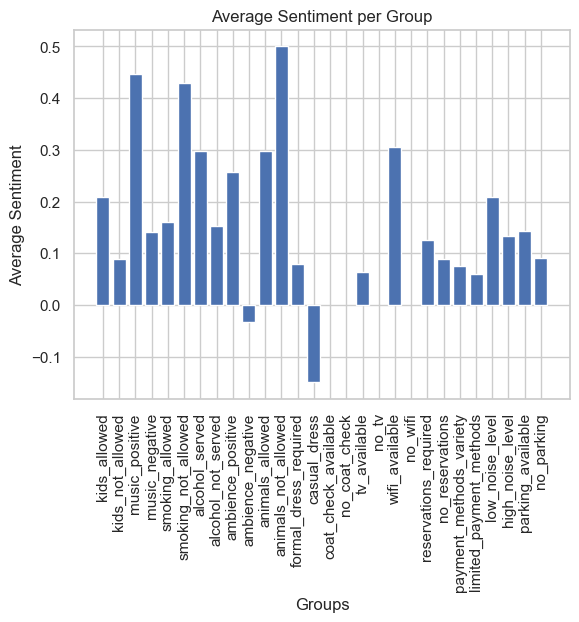

In [20]:
import matplotlib.pyplot as plt

# Sentiment Visualization
average_sentiments = [merged_data[group + '_sentiment'].mean() for group in keyword_groups.keys()]
plt.bar(keyword_groups.keys(), average_sentiments)
plt.xticks(rotation=90)
plt.title('Average Sentiment per Group')
plt.xlabel('Groups')
plt.ylabel('Average Sentiment')
plt.show()


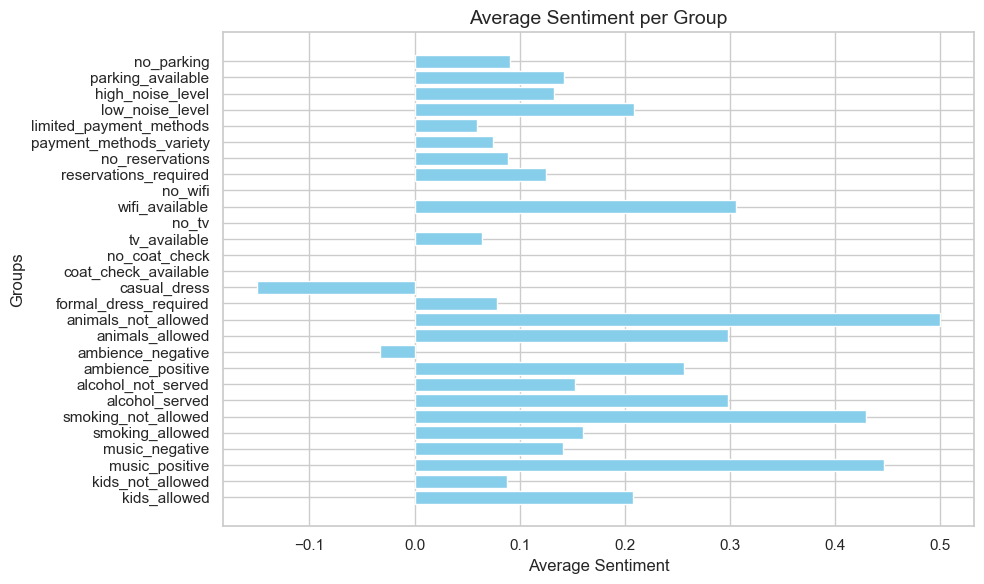

In [32]:
import matplotlib.pyplot as plt

# Assuming average_sentiments and keyword_groups are defined as per your code

# Increase the figure size for better readability
plt.figure(figsize=(10, 6))

# Create a horizontal bar chart for better visibility of group names
plt.barh(list(keyword_groups.keys()), average_sentiments, color='skyblue')

# Add titles and labels with a readable font size
plt.title('Average Sentiment per Group', fontsize=14)
plt.xlabel('Average Sentiment', fontsize=12)
plt.ylabel('Groups', fontsize=12)

# Adjust layout for a clean look
plt.tight_layout()

# Show the plot
plt.show()


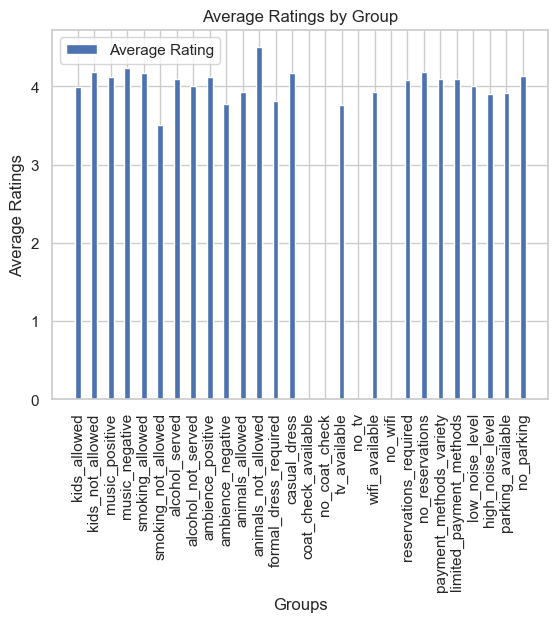

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def contains_keywords(text, keywords):
    lower_text = text.lower()
    return any(re.search(r'\b' + keyword + r'\b', lower_text) for keyword in keywords)

avg_ratings = []

for group, keywords in keyword_groups.items():
    merged_data[group + '_present'] = merged_data['text'].apply(lambda x: contains_keywords(x, keywords))
    avg_rating = merged_data[merged_data[group + '_present']]['stars_x'].mean()
    avg_ratings.append(avg_rating)

# Average Rating Visualization
x = np.arange(len(keyword_groups))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects = ax.bar(x, avg_ratings, width, label='Average Rating')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Groups')
ax.set_ylabel('Average Ratings')
ax.set_title('Average Ratings by Group')
ax.set_xticks(x)
ax.set_xticklabels(keyword_groups.keys(), rotation=90)
ax.legend()

plt.show()



In [22]:
# from textblob import TextBlob
# import pandas as pd
# import numpy as np
# import re

# # Sample DataFrame and food items list
# # Replace with your actual DataFrame and food items

# food_items = ["Eggs", 'Omlette',"Pancakes", "French Toast", "Avocado","Toast", "Omelettes", "Waffles", "Burrito", "Bagels",'Sausage','Bacon',"Granola",'Yogurt', "Parfait", "Acai Bowl", "Shakshuka", "Sandwiches", "Frittata", "Salmon", "Hash Browns",

# "Coffee", "Tea", "Orange Juice",'Juice',"Mimosa", "Bloody Mary", "Bellini", "Smoothies", "Iced Coffee", "Hot Chocolate", "Fresh Fruit Juices", "Cappuccino", "Chai Latte", "Irish Coffee", "Sparkling Water",'shakes','toast']  # Add more items as needed

# def find_food_sentiment(text, food_items):
#     sentences = [sentence for sentence in TextBlob(text).sentences]
#     food_sentiments = {}
    
#     # Lowercase the food items for case-insensitive matching
#     food_items_lower = [item.lower() for item in food_items]

#     for sentence in sentences:
#         for food in food_items_lower:
#             if re.search(r'\b' + re.escape(food) + r'\b', str(sentence).lower()):
#                 sentiment = sentence.sentiment.polarity
#                 if food in food_sentiments:
#                     food_sentiments[food].append(sentiment)
#                 else:
#                     food_sentiments[food] = [sentiment]
    
#     return food_sentiments
# merged_data['food_sentiments'] = merged_data['text'].apply(lambda x: find_food_sentiment(x, food_items))

# # View the results



In [23]:
# sentiment_data = []
# for idx, row in merged_data.iterrows():
#     for food, sentiments in row['food_sentiments'].items():
#         for sentiment in sentiments:
#             sentiment_data.append({'Food_Item': food, 'Sentiment': sentiment})

# sentiment_df = pd.DataFrame(sentiment_data)
# average_sentiments = sentiment_df.groupby('Food_Item')['Sentiment'].mean().sort_values(ascending=False)
# print(average_sentiments)



In [24]:
# import pandas as pd

# # Example DataFrame structure
# # merged_data = pd.DataFrame({
# #     'text': ['Loved the pancakes', 'The eggs were bad', ...],
# #     'rating': [5, 3, ...]
# # })

# food_items = ["Eggs", 'Omlette',"Pancakes", "French Toast", "Avocado","Toast", "Omelettes", "Waffles", "Burrito", "Bagels",'Sausage','Bacon',"Granola",'Yogurt', "Parfait", "Acai Bowl", "Shakshuka", "Sandwiches", "Frittata", "Salmon", "Hash Browns",

# "Coffee", "Tea", "Orange Juice",'Juice',"Mimosa", "Bloody Mary", "Bellini", "Smoothies", "Iced Coffee", "Hot Chocolate", "Fresh Fruit Juices", "Cappuccino", "Chai Latte", "Irish Coffee", "Sparkling Water",'shakes','toast']  # Add more items as needed


# # Initialize a dictionary to hold total ratings and counts for each food item
# food_ratings = {food: {'total_rating': 0, 'count': 0} for food in food_items}

# # Calculate total ratings and counts
# for index, row in merged_data.iterrows():
#     for food in food_items:
#         if food.lower() in row['text'].lower():
#             food_ratings[food]['total_rating'] += row['stars_x']
#             food_ratings[food]['count'] += 1

# # Calculate average ratings
# average_ratings = {food: total['total_rating'] / total['count'] if total['count'] > 0 else 0 for food, total in food_ratings.items()}


In [25]:
# import matplotlib.pyplot as plt

# # Convert the average ratings to a DataFrame for easy plotting
# avg_ratings_df = pd.DataFrame(list(average_ratings.items()), columns=['Food_Item', 'Average_Rating'])

# # Sorting the values for a better visualization
# avg_ratings_df = avg_ratings_df.sort_values(by='Average_Rating', ascending=False)

# # Creating the bar chart
# plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
# plt.bar(avg_ratings_df['Food_Item'], avg_ratings_df['Average_Rating'], color='skyblue')
# plt.xlabel('Food Items')
# plt.ylabel('Average Rating')
# plt.title('Average Ratings for Food Items')
# plt.xticks(rotation=45, ha='right')  # Rotate the food item labels for readability
# plt.tight_layout()  # Adjust layout to fit labels
# plt.show()


In [26]:
# #part2from transformers import pipeline
# import pandas as pd

# merged_data2=merged_data
# sentiment_pipeline = pipeline("sentiment-analysis")

# def get_sentiment_score(review):
#     # Apply the sentiment-analysis model
#     result = sentiment_pipeline(review[:512])  # Model has a limit on input length
#     # You can modify this to handle different aspects of the results as needed
#     return result[0]['label'], result[0]['score']

# # Apply the sentiment analysis to each review
# # Note: This might take a significant amount of time for a large dataset
# merged_data2['sentiment_analysis'] = merged_data2['text'].apply(get_sentiment_score)

# # View the results
# print(merged_data2.head())


In [27]:
#sentiment polarity using textblob packages of words that have synonyms to the attributes

# from textblob import TextBlob
# import numpy as np
# import re


# keyword_groups = {
#     "kids": ["kids", "children", "child"],
#     "music_dancing": ["dancing", "music", "dance", "party"],
#     "smoking": ["smoking", "cigarettes", "hookah", "smoke", "tobacco",'vape'],
#     "alcohol": ["alcohol", "drinks", "mocktail", "cocktail", "beer", "wine", "spirits",'happyhour'],
#     "ambience": ["atmosphere", "ambience", "vibe", "artsy", "environment", "mood",'outside','accessible','wheelchair','ada','friendly','server','service','waiter','waitress'],
#     "animals": ["animals", "dogs", "cats", "pets",'pet','furry'],
#     "dress": ["dress", "attire", "outfit", "clothing", "fashion",'formal'],
#     "coat_check": ["coat check", "cloakroom"],
#     "tv": ["tv", "television"],
#     "wifi": ["wifi", "wi-fi", "internet",'connection'],
#     "reservation": ["reservation", "booking",'inadvance','appointment'],
#     "payment_methods": ["credit cards", "venmo", "apple pay", "cash", "debit", "payment"],
#     "noise_level": ["noise level", "loud", "quiet", "noisy", "sound", "volume"],
#     'parking':['parking']
    
# }

# def find_group_sentiment(text, keywords):
#     lower_text = text.lower()  
#     sentences = [sentence for sentence in TextBlob(lower_text).sentences if any(re.search(r'\b' + keyword + r'\b', str(sentence).lower()) for keyword in keywords)]
#     sentiments = [sentence.sentiment.polarity for sentence in sentences]
#     return np.mean(sentiments) if sentiments else None  


# for group, keywords in keyword_groups.items():
#     merged_data[group + '_sentiment'] = merged_data['text'].apply(lambda x: find_group_sentiment(x.lower(), keywords))


In [28]:
# import matplotlib.pyplot as plt

# for group in keyword_groups.keys():
#     column_name = group + '_sentiment'
#     plt.figure()
#     merged_data[column_name].hist(bins=20)
#     plt.title(f"Sentiment Distribution for {group.capitalize()}")
#     plt.xlabel("Sentiment Score")
#     plt.ylabel("Frequency")
#     plt.show()
# The sentiment scores typically range from -1 to 1, where -1 indicates very negative sentiment, 1 indicates very positive sentiment, and scores around 0 are neutral.

In [29]:
# Print summary statistics for the new sentiment columns
# for group in keyword_groups.keys():
#     column_name = group + '_sentiment'
#     print(f"Sentiment Analysis for {group.capitalize()}:")
#     print(merged_data[column_name].describe(), "\n")


In [30]:
# Check for keyword presence in text and calculate average rating
# def contains_keywords(text, keywords):
#     lower_text = text.lower()
#     return any(re.search(r'\b' + keyword + r'\b', lower_text) for keyword in keywords)


# for group, keywords in keyword_groups.items():
#     merged_data[group + '_present'] = merged_data['text'].apply(lambda x: contains_keywords(x, keywords))
#     avg_rating_with_keyword = merged_data[merged_data[group + '_present']]['stars_x'].mean()
#     avg_rating_without_keyword = merged_data[~merged_data[group + '_present']]['stars_x'].mean()
#     print(f"Average rating with {group}: {avg_rating_with_keyword}, without: {avg_rating_without_keyword}")
